# Исследование данных оттока клиентов

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import phik


In [3]:
f1=pd.read_csv('contract.csv')
f2=pd.read_csv('internet.csv')
f3=pd.read_csv('personal.csv')
f4=pd.read_csv('phone.csv')
df=f3.merge(f4)
df1=f1.merge(f2)
dataset=df1.merge(df)
dataset.head(3)


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
1,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
2,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4835 entries, 0 to 4834
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        4835 non-null   object 
 1   BeginDate         4835 non-null   object 
 2   EndDate           4835 non-null   object 
 3   Type              4835 non-null   object 
 4   PaperlessBilling  4835 non-null   object 
 5   PaymentMethod     4835 non-null   object 
 6   MonthlyCharges    4835 non-null   float64
 7   TotalCharges      4835 non-null   object 
 8   InternetService   4835 non-null   object 
 9   OnlineSecurity    4835 non-null   object 
 10  OnlineBackup      4835 non-null   object 
 11  DeviceProtection  4835 non-null   object 
 12  TechSupport       4835 non-null   object 
 13  StreamingTV       4835 non-null   object 
 14  StreamingMovies   4835 non-null   object 
 15  gender            4835 non-null   object 
 16  SeniorCitizen     4835 non-null   int64  


In [5]:
dataset['PaymentMethod'].value_counts().to_frame()#в основном получают электронный чек

,PaymentMethod
Electronic check,2017
Bank transfer (automatic),1069
Credit card (automatic),1037
Mailed check,712


In [6]:
dataset['BeginDate'].value_counts().to_frame().head(20) #начало договора

,BeginDate
2014-02-01,269
2019-09-01,178
2019-10-01,158
2019-11-01,153
2019-12-01,147
2014-03-01,125
2019-07-01,110
2020-01-01,106
2019-06-01,100
2019-05-01,96


In [7]:
dataset['EndDate'].value_counts().to_frame().head(20) #конец договора

,EndDate
No,3249
2019-11-01 00:00:00,414
2019-10-01 00:00:00,401
2019-12-01 00:00:00,392
2020-01-01 00:00:00,379


count    4835.000000
mean       81.755171
std        18.303085
min        42.900000
25%        69.775000
50%        82.500000
75%        95.700000
max       118.750000
Name: MonthlyCharges, dtype: float64


<AxesSubplot:>

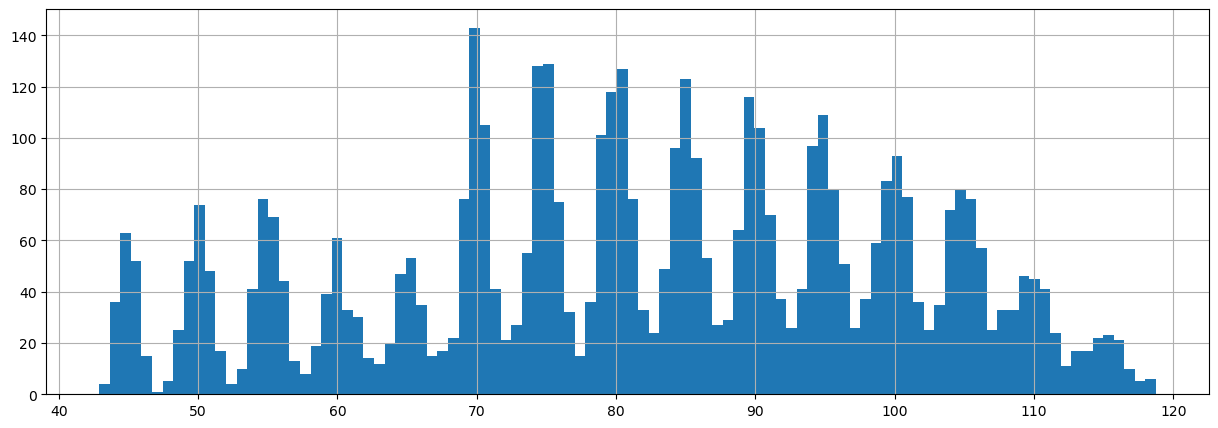

In [8]:
print(dataset['MonthlyCharges'].describe())#cсредняя: 81.76; 50%(половина): 82.5
dataset['MonthlyCharges'].hist(bins = 100,figsize = (15, 5))

In [9]:
dataset['TotalCharges'].describe()

count     4835
unique    4628
top       45.3
freq         5
Name: TotalCharges, dtype: object

In [10]:
dataset['PaperlessBilling'].value_counts().to_frame()

,PaperlessBilling
Yes,3338
No,1497


In [11]:
dataset['SeniorCitizen'].value_counts().to_frame()#старый клиент или нет

,SeniorCitizen
0,3849
1,986


In [12]:
dataset = dataset.fillna('No')
def status(row):
    end_date = row['EndDate']
    if end_date == 'No':
        return '0'
    return '1'

dataset['Type'] = dataset['Type'].replace('One year', 0)
dataset['Type'] = dataset['Type'].replace('Month-to-month', 1)
dataset['Type'] = dataset['Type'].replace('Two year', 2)
dataset.head(3)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,5575-GNVDE,2017-04-01,No,0,No,Mailed check,56.95,1889.5,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
1,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,1,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
2,9237-HQITU,2019-09-01,2019-11-01 00:00:00,1,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No


In [13]:
dataset['TotalCharges'].unique()

array(['1889.5', '108.15', '151.65', ..., '7362.9', '306.6', '6844.5'],
      dtype=object)

In [14]:
dataset['PaperlessBilling'] = dataset['PaperlessBilling'].replace('No', 0.0)
dataset['PaperlessBilling'] = dataset['PaperlessBilling'].replace('Yes', 1.0)

dataset['PaymentMethod'] = dataset['PaymentMethod'].replace('Mailed check', 0.0)
dataset['PaymentMethod'] = dataset['PaymentMethod'].replace('Electronic check', 1.0)
dataset['PaymentMethod'] = dataset['PaymentMethod'].replace('Credit card (automatic)', 2.0)
dataset['PaymentMethod'] = dataset['PaymentMethod'].replace('Bank transfer (automatic)', 3.0)

dataset['InternetService'] = dataset['InternetService'].replace('DSL', 0.0)
dataset['InternetService'] = dataset['InternetService'].replace('Fiber optic', 1.0)

dataset['OnlineSecurity'] = dataset['OnlineSecurity'].replace('No', 0.0)
dataset['OnlineSecurity'] = dataset['OnlineSecurity'].replace('Yes', 1.0)

dataset['OnlineBackup'] = dataset['OnlineBackup'].replace('No', 0.0)
dataset['OnlineBackup'] = dataset['OnlineBackup'].replace('Yes', 1.0)

dataset['DeviceProtection'] = dataset['DeviceProtection'].replace('No', 0.0)
dataset['DeviceProtection'] = dataset['DeviceProtection'].replace('Yes',1.0)

dataset['TechSupport'] = dataset['TechSupport'].replace('No', 0.0)
dataset['TechSupport'] = dataset['TechSupport'].replace('Yes', 1.0)

dataset['StreamingTV'] = dataset['StreamingTV'].replace('No', 0.0)
dataset['StreamingTV'] = dataset['StreamingTV'].replace('Yes', 1.0)

dataset['StreamingMovies'] = dataset['StreamingMovies'].replace('No',0.0)
dataset['StreamingMovies'] = dataset['StreamingMovies'].replace('Yes', 1.0)

dataset['gender'] = dataset['gender'].replace('Male', 0.0)
dataset['gender'] = dataset['gender'].replace('Female', 1.0)

dataset['Partner'] = dataset['Partner'].replace('No', 0.0)
dataset['Partner'] = dataset['Partner'].replace('Yes', 1.0)

dataset['Dependents'] = dataset['Dependents'].replace('No', 0.0)
dataset['Dependents'] = dataset['Dependents'].replace('Yes', 1.0)

dataset['MultipleLines'] = dataset['MultipleLines'].replace('No', 0.0)
dataset['MultipleLines'] = dataset['MultipleLines'].replace('Yes', 1.0)
new_type_list = []
for i in dataset['TotalCharges']:
    try:
        i = float(i)
    except:
        i = 0
    new_type_list.append(i)


dataset['Type'] = dataset['Type'].astype(float)
dataset['SeniorCitizen'] = dataset['SeniorCitizen'].astype(float)

In [15]:
# тут точно есть пробелы
(dataset['TotalCharges'] ==' ').value_counts()
dataset = dataset.loc[dataset['TotalCharges'] !=' ']
dataset['TotalCharges'] = dataset['TotalCharges'].astype('float64')

In [16]:
#целевой признак- ушел клиент или нет
dataset['churn'] = 'client_away'
dataset.loc[dataset['EndDate'] == 'No', 'churn'] = 'client_stay'
dataset['churn'].value_counts(normalize=True)

client_stay    0.671772
client_away    0.328228
Name: churn, dtype: float64

In [17]:
#у дат должен быть формат datetime
dataset['BeginDate'] = pd.to_datetime(dataset['BeginDate'], format = '%Y-%m-%d')
dataset.loc[dataset['EndDate'] == 'No', 'EndDate'] = '2020-02-01'#такая дата потому что последняя что есть в файле это 2020-01-01
dataset['EndDate'] = pd.to_datetime(dataset['EndDate'], format = '%Y-%m-%d')

In [18]:
#добавляем столбец дейсвия договора в днях то есть до каких пор клиент будет клиентом

dataset['begin_contract_year'] = pd.DatetimeIndex(dataset['BeginDate']).year#нужно знать год начала контракта
dataset['end_contract_year'] = pd.DatetimeIndex(dataset['EndDate']).year##нужно знать год конца контракта
dataset['begin_contract_month'] = pd.DatetimeIndex(dataset['BeginDate']).month#нужно знать месяц начала контракта
dataset['end_contract_month'] = pd.DatetimeIndex(dataset['EndDate']).month#нужно знать месяц конца контракта

#добавляем столбец дейсвие договора в месяцах
dataset['clienttime'] = (dataset['end_contract_year'] - dataset['begin_contract_year']) * 365 + (dataset['end_contract_month']
                - dataset['begin_contract_month']) * 30


#удаляем лишние столбцы     
dataset = dataset.drop(['end_contract_month'], axis=1)#'begin_contract_year','end_contract_year','begin_contract_month' 

In [19]:
dataset.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,...,gender,SeniorCitizen,Partner,Dependents,MultipleLines,churn,begin_contract_year,end_contract_year,begin_contract_month,clienttime
0,5575-GNVDE,2017-04-01,2020-02-01,0.0,0.0,0.0,56.95,1889.50,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,client_stay,2017,2020,4,1035
1,3668-QPYBK,2019-10-01,2019-12-01,1.0,1.0,0.0,53.85,108.15,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,client_away,2019,2019,10,60
2,9237-HQITU,2019-09-01,2019-11-01,1.0,1.0,1.0,70.70,151.65,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,client_away,2019,2019,9,60
3,9305-CDSKC,2019-03-01,2019-11-01,1.0,1.0,1.0,99.65,820.50,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,client_away,2019,2019,3,240
4,1452-KIOVK,2018-04-01,2020-02-01,1.0,1.0,2.0,89.10,1949.40,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,client_stay,2018,2020,4,670


In [20]:
#нам же нужно посмотреть сколько клиентов на какие услуги подключились
dataset['services'] = 'all_services '
dataset.loc[dataset['MultipleLines'] == -1, 'services'] = 'InternetService' 
dataset.loc[dataset['InternetService'] == -1,'services'] = 'PhoneServices' 
dataset.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,...,SeniorCitizen,Partner,Dependents,MultipleLines,churn,begin_contract_year,end_contract_year,begin_contract_month,clienttime,services
0,5575-GNVDE,2017-04-01,2020-02-01,0.0,0.0,0.0,56.95,1889.50,0.0,1.0,...,0.0,0.0,0.0,0.0,client_stay,2017,2020,4,1035,all_services
1,3668-QPYBK,2019-10-01,2019-12-01,1.0,1.0,0.0,53.85,108.15,0.0,1.0,...,0.0,0.0,0.0,0.0,client_away,2019,2019,10,60,all_services
2,9237-HQITU,2019-09-01,2019-11-01,1.0,1.0,1.0,70.70,151.65,1.0,0.0,...,0.0,0.0,0.0,0.0,client_away,2019,2019,9,60,all_services
3,9305-CDSKC,2019-03-01,2019-11-01,1.0,1.0,1.0,99.65,820.50,1.0,0.0,...,0.0,0.0,0.0,1.0,client_away,2019,2019,3,240,all_services
4,1452-KIOVK,2018-04-01,2020-02-01,1.0,1.0,2.0,89.10,1949.40,1.0,0.0,...,0.0,0.0,1.0,1.0,client_stay,2018,2020,4,670,all_services


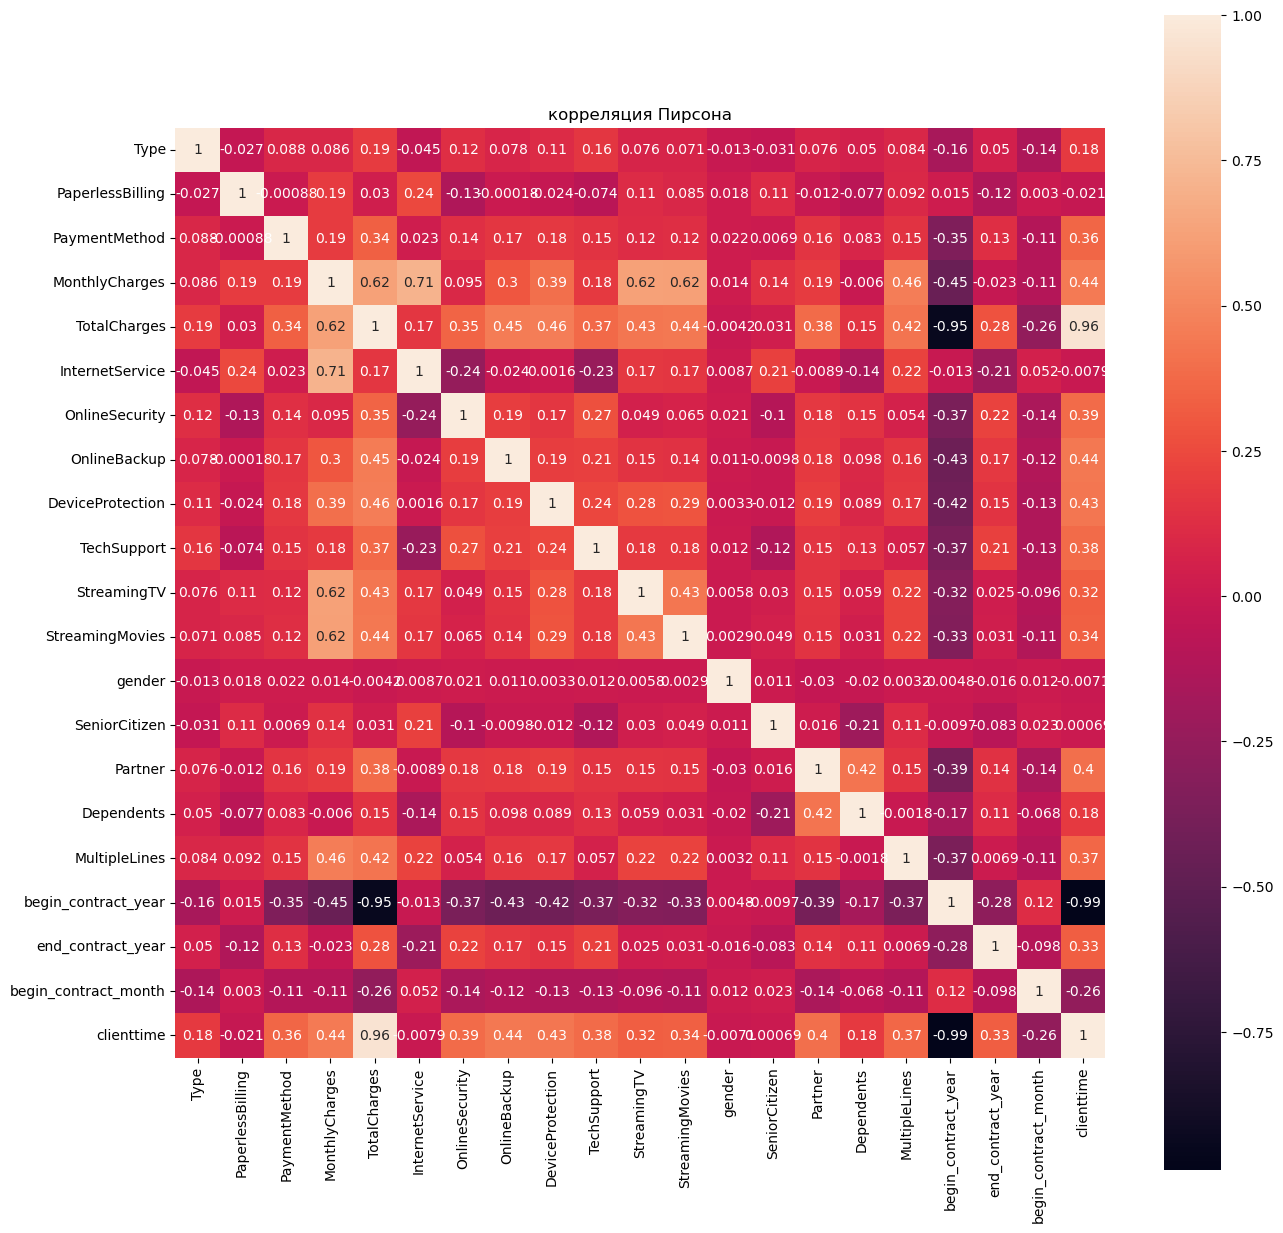

In [21]:
correlation = dataset.corr()
plt.figure(figsize=(15,15))
cmap = plt.cm.twilight
sns.heatmap(correlation, vmax=1, square=True,annot=True)

plt.title('корреляция Пирсона')
plt.show()

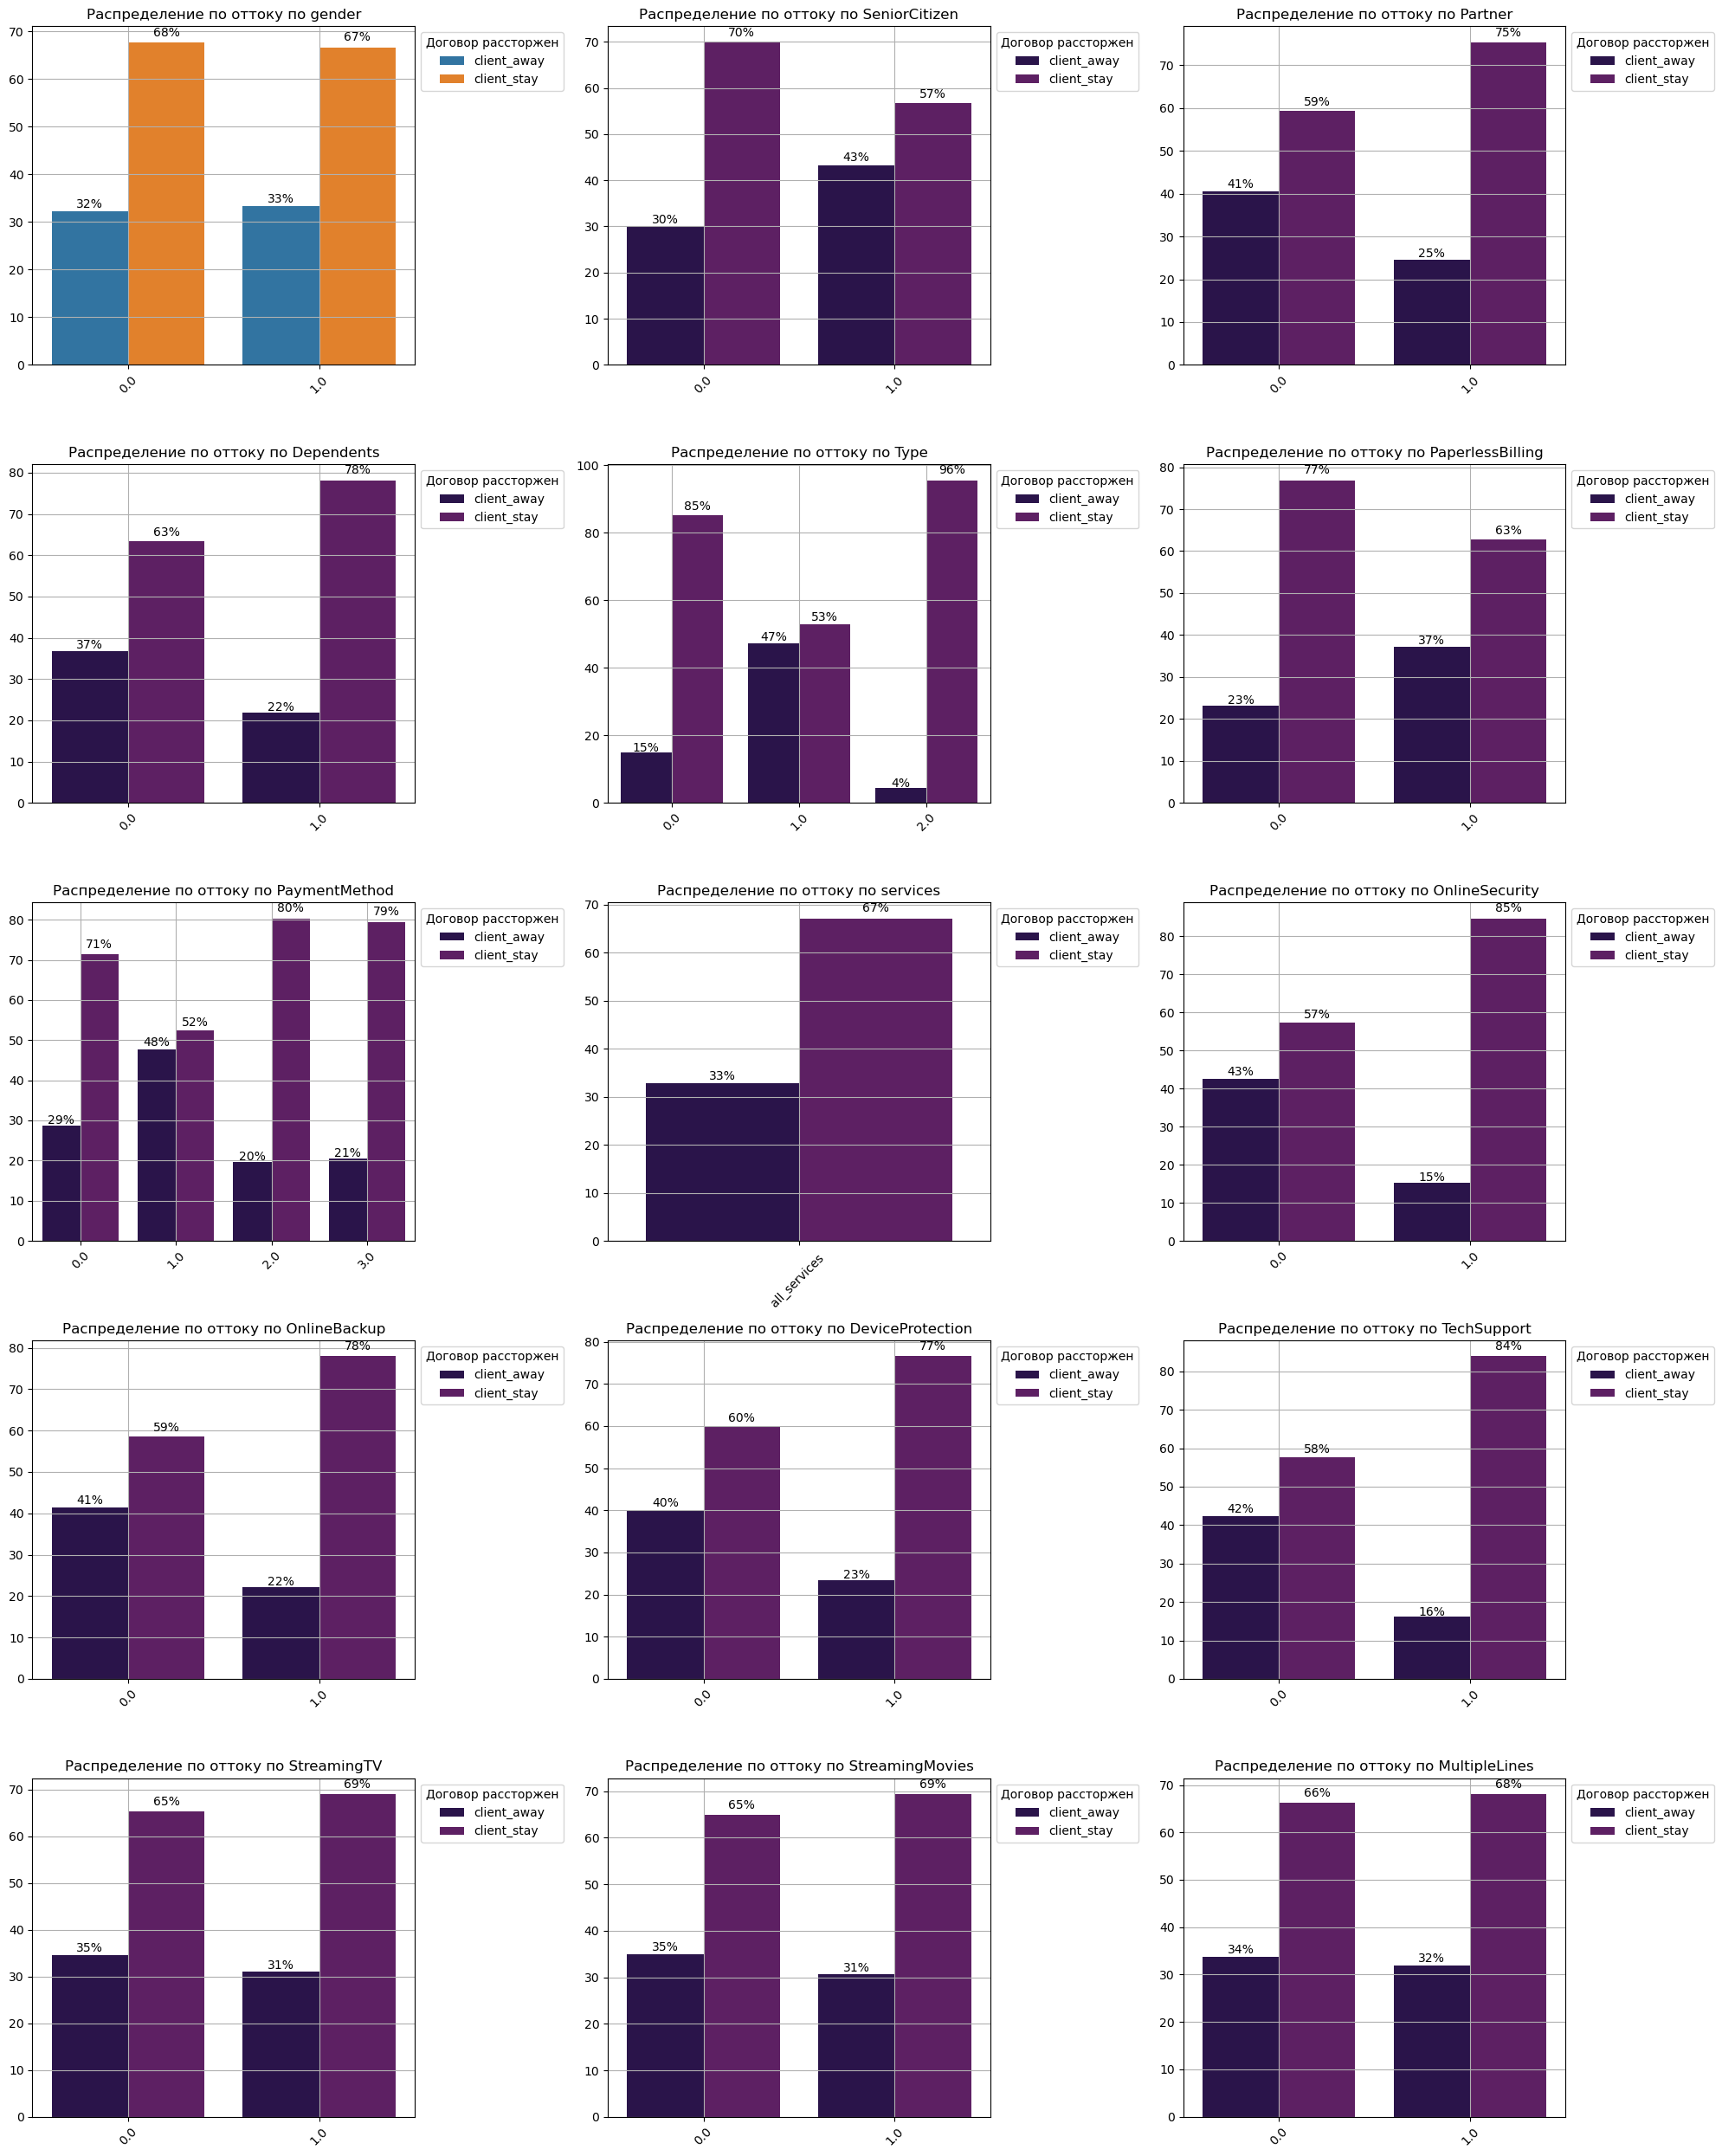

In [22]:
main_columns_1 = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Type',
                  'PaperlessBilling', 'PaymentMethod',
                 'services', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                  'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']
fig, axes = plt.subplots(5, 3, figsize=(20, 25))
for ax, column in zip(axes.ravel(), main_columns_1):
    # нормализация данных
    data = dataset\
    .groupby(['churn', column])[column]\
    .count()\
    .groupby(column).apply(lambda x: 100 * x / x.sum())\
    .to_frame().stack().reset_index()

    sns.barplot(x=column, y=0, hue='churn', data=data, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set(ylabel=None, xlabel=None)
    ax.set_title(f'Распределение по оттоку по {column}')
    ax.legend(title='Договор рассторжен', loc=2, bbox_to_anchor=(1, 1), fontsize=10)
    ax.grid()
    sns.set_palette('inferno')
    # добавим значения столбцов на диаграммы
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height/100:.0%}', (x+width/2, y+height*1.02), ha='center')
plt.tight_layout()
plt.show()

# Построение моделей для прогнозирования оттока

In [81]:
#pip install catboost 

Для решения данной проблемы используются модели CatBoostClassifier и DecisionTreeClassifier. Для удобства перед делением данных на тренировочные и тестовые необходимо провести действия по созданию дополнительных столбцов и удалению ненужных. Понять какие данные нужны, а какие нет мы понимаем из исследования данных, проведенных выше. 

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, roc_curve, confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

from catboost import CatBoostClassifier
from catboost import cv
from catboost import Pool
import catboost as cat
import matplotlib.pyplot as plt
import warnings
from warnings import filterwarnings
warnings.filterwarnings('error')
filterwarnings(action='ignore', category=DeprecationWarning, message='`np.bool` is a deprecated alias')
import packaging.version

In [5]:
contract=pd.read_csv('contract.csv')
internet=pd.read_csv('internet.csv')
personal=pd.read_csv('personal.csv')
phone=pd.read_csv('phone.csv')

In [6]:
contract['Client_left'] = contract['EndDate'].apply(lambda x: 1 if x == 'No' else 0)
contract['Client_left'].value_counts()


1    5174
0    1869
Name: Client_left, dtype: int64

In [7]:
data = contract.merge(internet, on ='customerID', how = 'left')
data = data.merge(personal, on ='customerID', how = 'left')
data = data.merge(phone, on ='customerID', how = 'left')

In [8]:
empty_values= ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for empty in empty_values:
    data[empty] = data[empty].fillna('NA')

In [9]:
#проверка на дубликаты
data.index.duplicated().sum()

0

In [10]:
# data['TotalCharges'] = data['TotalCharges'].astype('float') не смог перевести, кажется тут есть пропуски, посмотрю на этот столбец отдельно
data.query('TotalCharges == " "') 

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Client_left,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,,1,DSL,...,No,Yes,Yes,Yes,No,Female,0,Yes,Yes,NA
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,,1,NA,...,NA,NA,NA,NA,NA,Male,0,No,Yes,No
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,,1,DSL,...,Yes,Yes,No,Yes,Yes,Female,0,Yes,Yes,No
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,,1,NA,...,NA,NA,NA,NA,NA,Male,0,Yes,Yes,Yes
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,,1,DSL,...,Yes,Yes,Yes,Yes,No,Female,0,Yes,Yes,NA
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,,1,NA,...,NA,NA,NA,NA,NA,Male,0,Yes,Yes,No
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,,1,NA,...,NA,NA,NA,NA,NA,Male,0,Yes,Yes,Yes
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,,1,NA,...,NA,NA,NA,NA,NA,Female,0,Yes,Yes,No
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,,1,NA,...,NA,NA,NA,NA,NA,Male,0,Yes,Yes,No
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,,1,DSL,...,Yes,Yes,Yes,Yes,No,Female,0,Yes,Yes,Yes


In [11]:
data.loc[data['TotalCharges'] == ' ', 'TotalCharges'] = data['MonthlyCharges']
data['TotalCharges'] = data['TotalCharges'].astype('float')

In [12]:
data['BeginDate']=pd.to_datetime(data['BeginDate'],format = '%Y-%m-%d')
data['EndDate']=pd.to_datetime(data.loc[data['EndDate'] != 'No','EndDate'],format = '%Y-%m-%dT%H:%M:%S')

In [13]:
data['EndDate'].fillna('Active',inplace = True) #заменим значение No на Active для удобства

In [14]:
data.info()#проверяем

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   Client_left       7043 non-null   int64         
 9   InternetService   7043 non-null   object        
 10  OnlineSecurity    7043 non-null   object        
 11  OnlineBackup      7043 non-null   object        
 12  DeviceProtection  7043 non-null   object        
 13  TechSupport       7043 non-null   object        
 14  StreamingTV       7043 n

In [15]:
data['Services'] = 0 #все услуги
data.loc[data['MultipleLines'] == 'NA', 'Services'] = 1
data.loc[data['InternetService'] == 'NA', 'Services'] = 2

In [16]:
data['Services'].value_counts()

0    4835
2    1526
1     682
Name: Services, dtype: int64

In [17]:
data['EndDate'] = data['EndDate'].fillna('No')

In [18]:
data_left = data[data['EndDate'] != 'Active']

In [19]:
data['Begin_Year'] = pd.DatetimeIndex(data['BeginDate']).year #округлим до года для удобства просмотра

In [20]:
df = data

In [21]:
data['MultipleLines'] = pd.Series(np.where(data['MultipleLines'].values == 'Yes', 1, 0),data.index)
data['Dependents'] = pd.Series(np.where(data['Dependents'].values == 'Yes', 1, 0),data.index)
data['Partner'] = pd.Series(np.where(data['Partner'].values == 'Yes', 1, 0),data.index)
data['gender'] = pd.Series(np.where(data['gender'].values == 'Female', 1, 0),data.index)
data['StreamingMovies'] = pd.Series(np.where(data['StreamingMovies'].values == 'Yes', 1, 0),data.index)
data['StreamingTV'] = pd.Series(np.where(data['StreamingTV'].values == 'Yes', 1, 0),data.index)
data['TechSupport'] = pd.Series(np.where(data['TechSupport'].values == 'Yes', 1, 0),data.index)
data['DeviceProtection'] = pd.Series(np.where(data['DeviceProtection'].values == 'Yes', 1, 0),data.index)
data['OnlineBackup'] = pd.Series(np.where(data['OnlineBackup'].values == 'Yes', 1, 0),data.index)
data['OnlineSecurity'] = pd.Series(np.where(data['OnlineSecurity'].values == 'Yes', 1, 0),data.index)
data['PaperlessBilling'] = pd.Series(np.where(data['PaperlessBilling'].values == 'Yes',1,0),data.index)

In [22]:
data = pd.get_dummies(df, columns = ['Type', 'InternetService','PaymentMethod'], drop_first = True)

In [23]:
#data.drop('Services', axis = 1, inplace = True)

In [24]:
data['BeginDate'].max()

Timestamp('2020-02-01 00:00:00')

In [25]:
data['EndDate'] = data['EndDate'].replace('Active', '2020-02-01')

In [26]:
data['lasted'] = (pd.to_datetime(data['EndDate']) - data['BeginDate']).dt.days

In [27]:

data.rename({'lasted': 'duration'}, axis=1, inplace=True)

In [28]:
data.drop('EndDate', axis = 1, inplace = True)
data.drop('BeginDate', axis = 1, inplace = True)

In [29]:
data.drop('TotalCharges', axis = 1, inplace = True)

In [30]:
data.drop('customerID', axis = 1, inplace = True)

In [31]:
data.drop('Services', axis = 1, inplace = True)
data.drop('Begin_Year', axis = 1, inplace = True)


In [32]:
data

,PaperlessBilling,MonthlyCharges,Client_left,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,...,Dependents,MultipleLines,Type_One year,Type_Two year,InternetService_Fiber optic,InternetService_NA,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,duration
0,1,29.85,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,31
1,0,56.95,1,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1036
2,1,53.85,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,61
3,0,42.30,1,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1371
4,1,70.70,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,84.80,1,1,0,1,1,1,1,0,...,1,1,1,0,0,0,0,0,1,730
7039,1,103.20,1,0,1,1,0,1,1,1,...,1,1,1,0,1,0,1,0,0,2191
7040,1,29.60,1,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,337
7041,1,74.40,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,123


# Моделирование

In [33]:
train_df, test_df = train_test_split(data, test_size = 0.2, random_state = 250722)


In [34]:
features_train = train_df.drop('Client_left', axis = 1)
features_test = test_df.drop('Client_left', axis = 1)

In [35]:

target_train = train_df['Client_left']
target_test = test_df['Client_left']


In [36]:
train_df, test_df = train_test_split(data, test_size = 0.2, random_state = 250722)


In [37]:
features_train = train_df.drop('Client_left', axis = 1)
features_test = test_df.drop('Client_left', axis = 1)

target_train = train_df['Client_left']
target_test = test_df['Client_left']

## CatBoostClassifier

In [38]:
train_dataset = Pool(features_train, target_train)
test_dataset = Pool(features_test, target_test)

In [39]:
model = CatBoostClassifier(loss_function = 'CrossEntropy',learning_rate = 0.03, random_state = 250722)
model.fit(train_dataset, eval_set = test_dataset, verbose = False)
Cat_Model_Prediction_Proba = model.predict_proba(features_test)[:,1]
roc_auc_score(target_test, Cat_Model_Prediction_Proba)

0.9255700317138681

In [40]:
Cat_boost_train = features_train[['duration','MonthlyCharges','Type_Two year',\
                              'InternetService_Fiber optic','PaymentMethod_Electronic check','PaperlessBilling','Type_One year','TechSupport', 'gender']]
Cat_boost_test = features_test[['duration','MonthlyCharges','Type_Two year',\
                              'InternetService_Fiber optic','PaymentMethod_Electronic check','PaperlessBilling','Type_One year','TechSupport', 'gender']]
train_dataset = Pool(Cat_boost_train, target_train)
test_dataset = Pool(Cat_boost_test, target_test)

In [41]:
modelCat = CatBoostClassifier( random_state = 250722)
Cat_GRID = GridSearchCV(modelCat,{  # Определение объекта кросс-валидации для CatBoostingClassifier
    'iterations': [500],
    'learning_rate' : [0.03],
    'depth' : range(3,15,3),
    'verbose' : [False]
}, cv = 5,scoring = 'roc_auc')

In [42]:
Cat_GRID.fit(Cat_boost_train, target_train)  # Обучение модели CatBoostingClassifier на кросс-валидации

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001D7AF4C82E0>,
             param_grid={'depth': range(3, 15, 3), 'iterations': [500],
                         'learning_rate': [0.03], 'verbose': [False]},
             scoring='roc_auc')

In [43]:
Cat_GRID.best_score_ 

0.9024919727080117

In [44]:
Cat_GRID.best_estimator_ 

In [45]:
Cat_GRID.best_params_ # Получение лучших параметров для классификаторов полученных на кросс-валидации

{'depth': 6, 'iterations': 500, 'learning_rate': 0.03, 'verbose': False}

In [48]:
modelCat = CatBoostClassifier(loss_function = 'CrossEntropy',iterations = 500, depth = 6,learning_rate = 0.03, random_state = 250722)

In [49]:
modelCat.fit(train_dataset, eval_set = test_dataset, verbose = False)

In [50]:
catPrediction_Proba = modelCat.predict_proba(Cat_boost_test)[:,1]

In [51]:
roc_auc_score(target_test, catPrediction_Proba)

0.9152683014347756

In [52]:
Cat_boost_pred = modelCat.predict(Cat_boost_test)
accuracy_score(target_test,Cat_boost_pred)

0.8772178850248403

## DecisionTreeClassifier

In [53]:
DT = DecisionTreeClassifier(random_state=250722, class_weight = 'balanced')

DT.fit(features_train, target_train)

DT_proba = DT.predict_proba(features_test)[:,1]

roc_auc_score(target_test, DT_proba)

0.7035096328895503

Feature importances:


<BarContainer object of 21 artists>

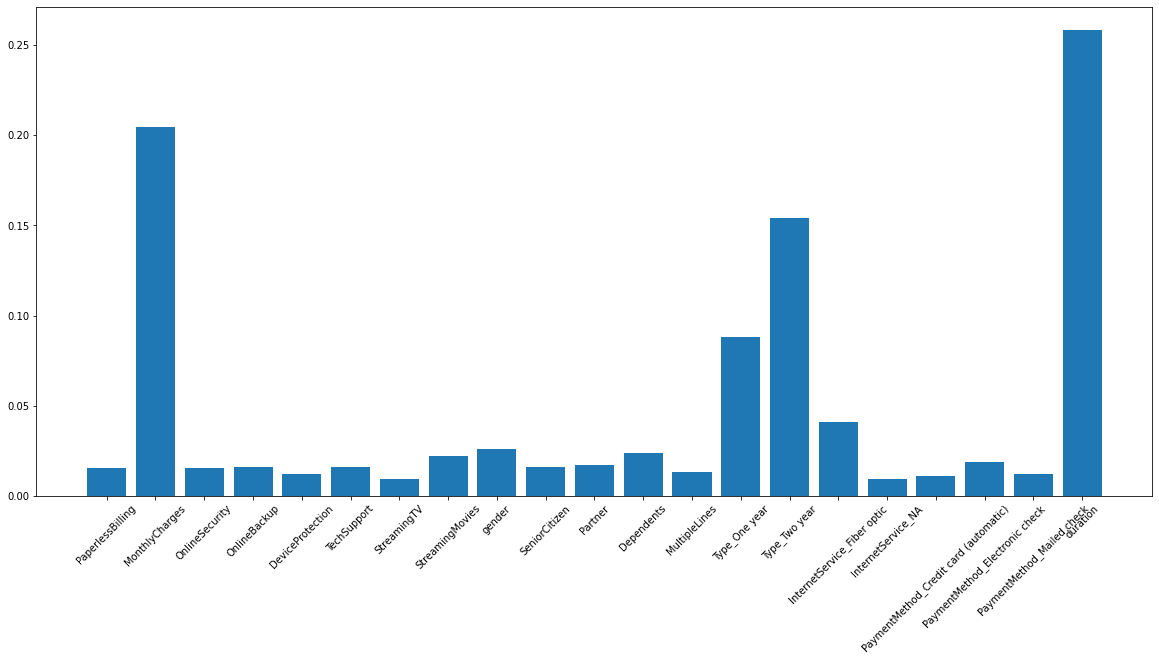

In [54]:
plt.figure(figsize=(20,9))
plt.xticks(rotation=45, fontsize=10) 
feature_importance3 = DT.feature_importances_
col_names = features_train.columns
#indices = np.argsort(feature_import2)[::-1]
print("Feature importances:")
#for f, idx in enumerate(indices):
#    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, col_names[idx], feature_import2[idx]))
plt.bar(col_names,feature_importance3)

In [55]:
DT_train = features_train[['duration','MonthlyCharges','Type_Two year','InternetService_Fiber optic',\
                             'Type_One year','PaymentMethod_Electronic check','gender','InternetService_NA','TechSupport']]

In [56]:
DT_test = features_test[['duration','MonthlyCharges','Type_Two year','InternetService_Fiber optic',\
                             'Type_One year','PaymentMethod_Electronic check','gender','InternetService_NA','TechSupport']]

In [218]:
DTG = GridSearchCV(DecisionTreeClassifier(criterion = 'entropy', class_weight='balanced'),{
    'max_depth': range(1, 10, 20),
    'min_samples_split' : range(4,28,4),
    'min_samples_leaf' : range(3,13,2)
}, cv = 5, scoring = 'roc_auc')

In [134]:
DTG.fit(DT_train,target_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='entropy'),
             param_grid={'max_depth': range(1, 10, 20),
                         'min_samples_leaf': range(3, 13, 2),
                         'min_samples_split': range(4, 28, 4)},
             scoring='roc_auc')

In [135]:
DTG.best_params_

{'max_depth': 1, 'min_samples_leaf': 3, 'min_samples_split': 4}

In [136]:
DTG.best_score_

0.6481243934767025

In [219]:
DTGauc = DecisionTreeClassifier(class_weight = 'balanced', max_depth=1, min_samples_leaf=3, min_samples_split=4, random_state = 250722)

DTGauc.fit(DT_train, target_train)

DTGauc_proba = DTGauc.predict_proba(DT_test)[:,1]

roc_auc_score(target_test, DTGauc_proba)

0.6390568686117135

In [220]:
DT_predict = DTGauc.predict(DT_test)
accuracy_score(target_test,DT_predict)

0.47835344215755854

## Итоговые результаты


In [57]:
results = {
    'Model' : ['CatBoostClassifier',  'DecisionTreeClassifier'],
    'Значение метрики ROC-AUC' :pd.Series([0.915, 0.639]),
    'Значение метрики accuracy': pd.Series([0.877, 0.478]),
    }
pd.DataFrame(results)

,Model,Значение метрики ROC-AUC,Значение метрики accuracy
0,CatBoostClassifier,0.915,0.877
1,DecisionTreeClassifier,0.639,0.478
